### Installing the Package

In [1]:
!pip install git+https://github.com/firekind/athena@v0.0.1

  Cloning https://github.com/firekind/athena (to revision v0.0.1) to /tmp/pip-req-build-28wurhzt
  Running command git clone -q https://github.com/firekind/athena /tmp/pip-req-build-28wurhzt
  Running command git checkout -q 76f26a105635a8dedade28cf37be0c051bd5ddc4
  Created wheel for athena: filename=athena-0.0.1-cp36-none-any.whl size=29405 sha256=de9db209b0aadf25c245d45726c7788b5a9237bd004faf6b9bbed7daac0e3fb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-st01jtb7/wheels/c6/98/d8/85f5f37d92af24edb6c8b143a23751e6034a2c173665356fed
Successfully built athena


#### Importing Model & required libraries

In [2]:
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR, OneCycleLR

from athena import datasets, Experiment, ClassificationSolver
from athena.models import ResNet18

In [3]:
from athena.utils.functions import plot_experiments

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 128 if device == 'cuda' else 64
epochs = 50

cuda


#### importing cifar10 dataset using transforms



In [5]:
train_loader = datasets.cifar10(download=True, batch_size=batch_size, use_default_transforms=True)
test_loader = datasets.cifar10(train=False, download=True, batch_size=batch_size, use_default_transforms=True)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
net = ResNet18().to(device)

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
def custom_loss_fn(y_pred, y_true):
   y_pred = F.log_softmax(y_pred, dim=-1)
   return F.nll_loss(y_pred, y_true)

#### Running the model

In [ ]:
# creating the experiment
exp = (
    Experiment("New Resnet 18 Model")
    .model(net)
    .solver(ClassificationSolver)
    .optimizer(optim.SGD, lr=0.01, momentum=0.9)
    .scheduler(StepLR, step_size=8, gamma=0.1)
    .epochs(50)
    .train_loader(train_loader)
    .test_loader(test_loader)
    .loss_fn(custom_loss_fn)
    .device(device)
    .build()
)

# running experiment
exp.run()

=> Running experiment: New Resnet 18 Model
Epoch: 1 / 50
782/782 [==============================] - 66s 85ms/step - loss: 1.2984 - accuracy: 53.3640
Test set: Average loss: 0.8902, Accuracy: 6788/10000 (67.88%)

Epoch: 2 / 50
782/782 [==============================] - 66s 85ms/step - loss: 0.7485 - accuracy: 73.7660
Test set: Average loss: 0.7033, Accuracy: 7547/10000 (75.47%)

Epoch: 3 / 50
782/782 [==============================] - 67s 85ms/step - loss: 0.5389 - accuracy: 81.2500
Test set: Average loss: 0.6172, Accuracy: 7914/10000 (79.14%)

Epoch: 4 / 50
782/782 [==============================] - 67s 85ms/step - loss: 0.4019 - accuracy: 85.9720
Test set: Average loss: 0.8227, Accuracy: 7485/10000 (74.85%)

Epoch: 5 / 50
782/782 [==============================] - 67s 86ms/step - loss: 0.2875 - accuracy: 89.8360
Test set: Average loss: 0.6854, Accuracy: 7959/10000 (79.59%)

Epoch: 6 / 50
782/782 [==============================] - 67s 85ms/step - loss: 0.2042 - accuracy: 92.7220
Test s

##### Accuracy & Loss Plots for training & testing

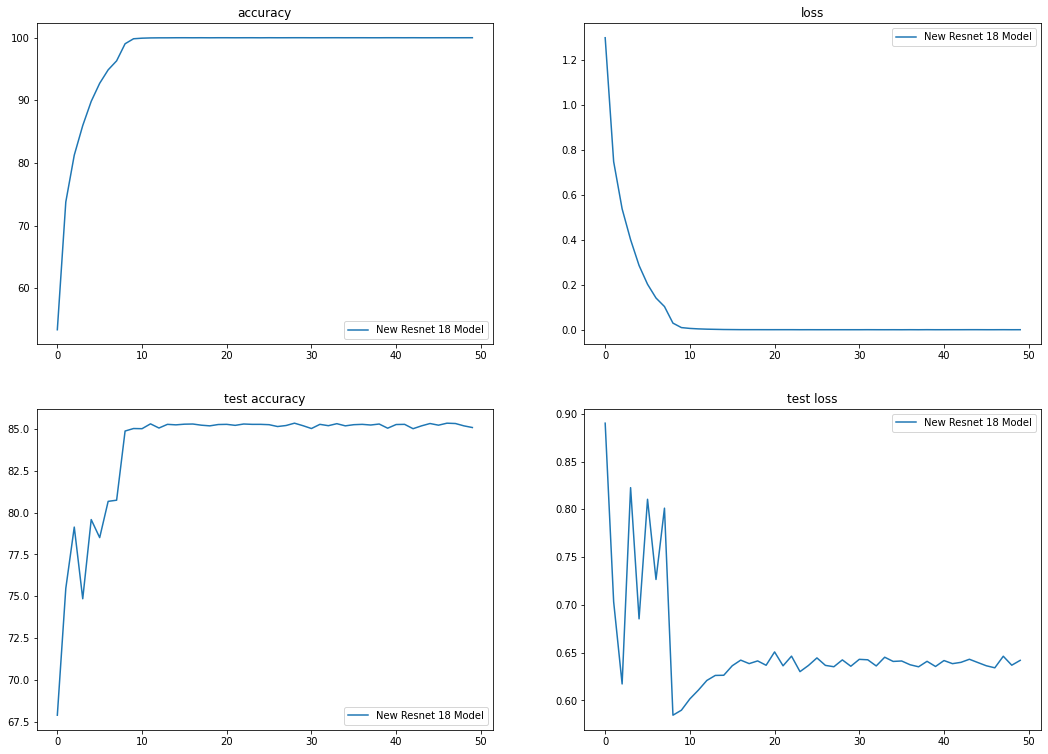

In [ ]:
plot_experiments([exp])